In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Work Files\\Personal Docs and Study Material\\ML\\insurance.csv')
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

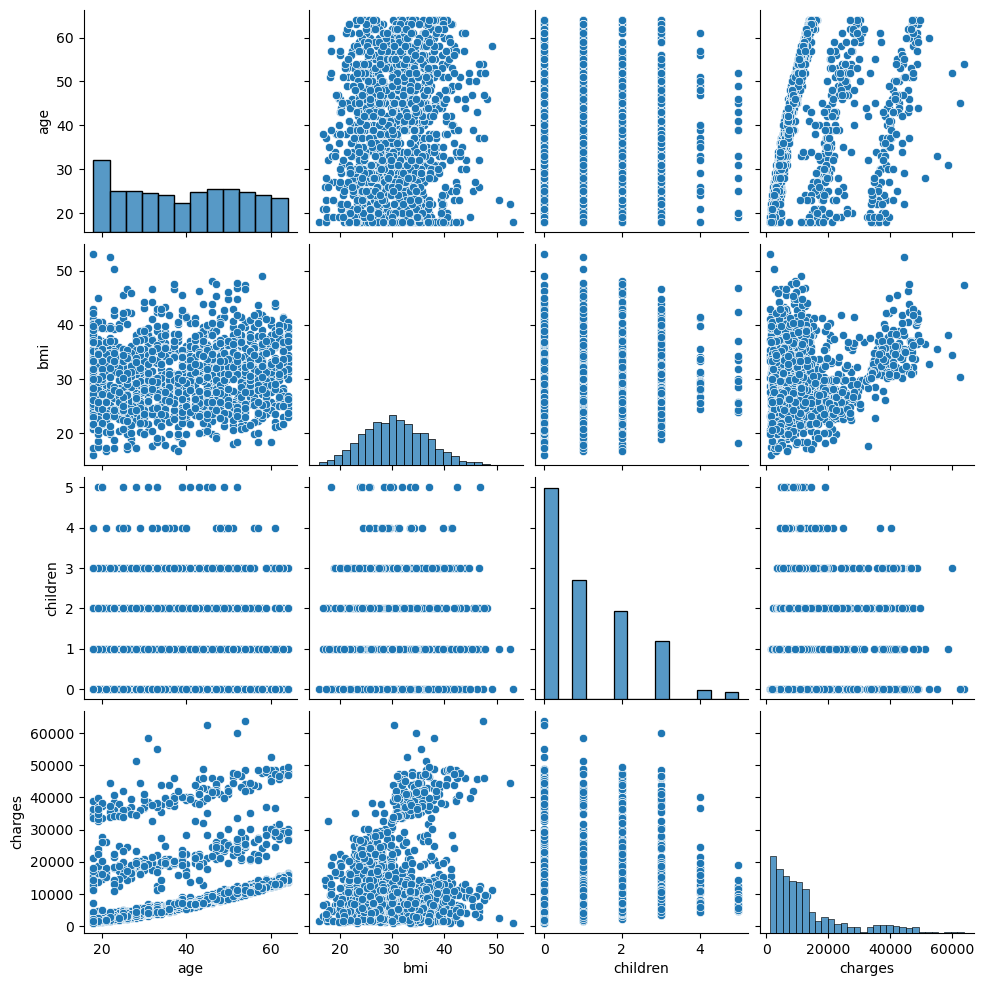

In [7]:
sns.pairplot(df)

In [8]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True)

<AxesSubplot:>

In [9]:
df[['age', 'bmi', 'children', 'charges']].corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

In [10]:
sns.histplot(df['age'], kde=True, bins=20)

<AxesSubplot:xlabel='age', ylabel='Count'>

In [11]:
sns.histplot(df['bmi'], kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

In [12]:
sns.histplot(df['charges'], kde=True, bins=30)

<AxesSubplot:xlabel='charges', ylabel='Count'>

## For bivariate or multi-variate analysis, there are couple of plots generally used
* Contigency Table -> A tally of counts between two or more categorical variables.
* Hexagonal -> A plot of two numeric variables with the records binned into hexagons
* Contour Plot -> A plot showing the density of two numeric variables like a topographical map
* Violin Plot -> Similar to a boxplot but showing the density estimate

<AxesSubplot:xlabel='children', ylabel='charges'>

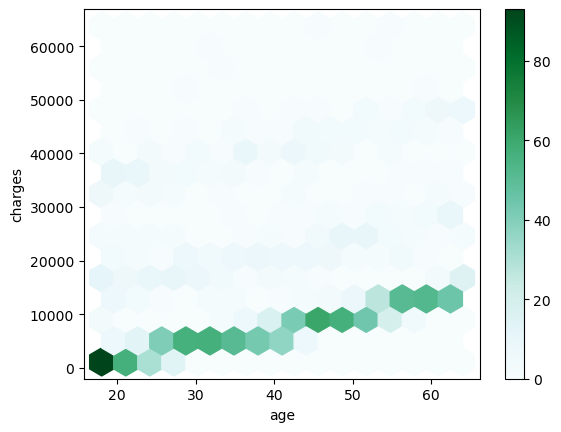

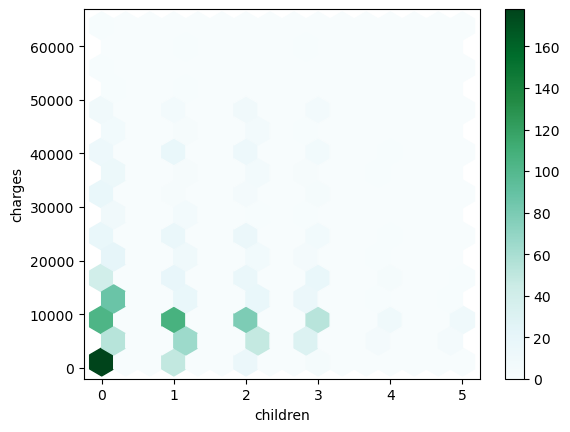

In [13]:
# ax = plt.subplot(131)

# ax.hexbin(x=df['age'], y=df['charges'], gridsize=15)
# # cb = plt.colorbar()
# ax.set_xlabel('Age')
# ax.set_ylabel('Charges')


# ax = plt.subplot(132)
# ax.hexbin(x=df['bmi'], y=df['charges'], gridsize=15)
# ax.set_xlabel('Age')
# ax.set_ylabel('Charges')

# ax = plt.subplot(133)
# ax.hexbin(x=df['children'], y=df['charges'], gridsize=15)
# ax.set_xlabel('children')
# ax.set_ylabel('Charges')
# plt.gcf().set_size_inches(10, 5)

df.plot.hexbin(x='age', y='charges', gridsize=15)
df.plot.hexbin(x='bmi', y='charges', gridsize=15)
df.plot.hexbin(x='children', y='charges', gridsize=15)

<AxesSubplot:xlabel='children', ylabel='charges'>

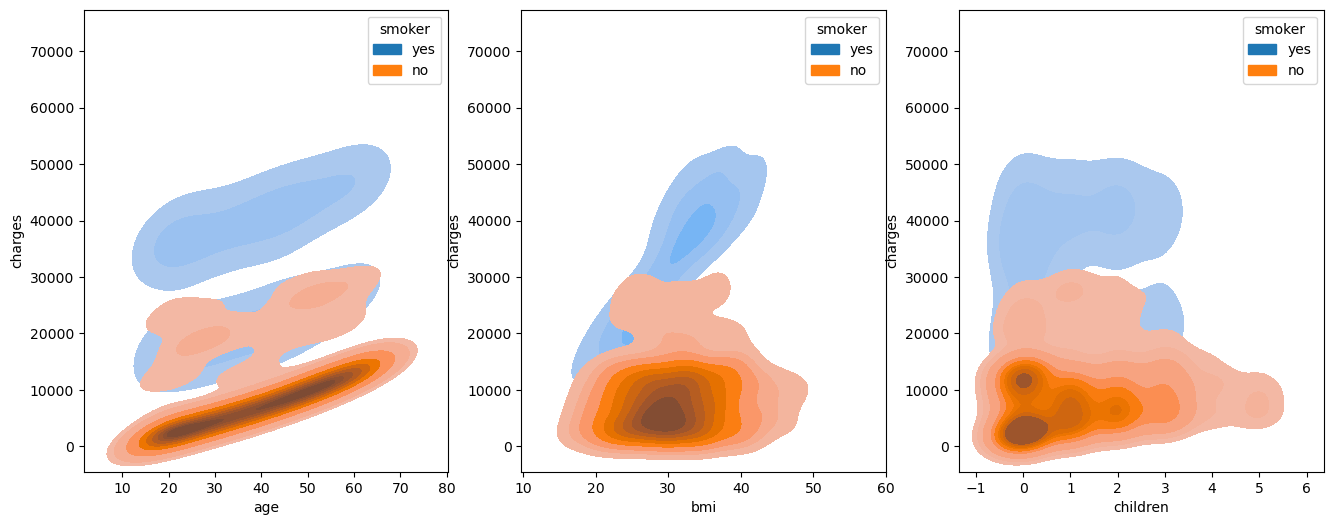

In [14]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(131)
sns.kdeplot(x='age', y='charges', data=df, fill=True, hue='smoker')

ax = fig.add_subplot(132)
sns.kdeplot(x='bmi', y='charges', data=df, fill=True, hue='smoker')

ax = fig.add_subplot(133)
sns.kdeplot(x='children', y='charges', data=df, fill=True, hue='smoker')


Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

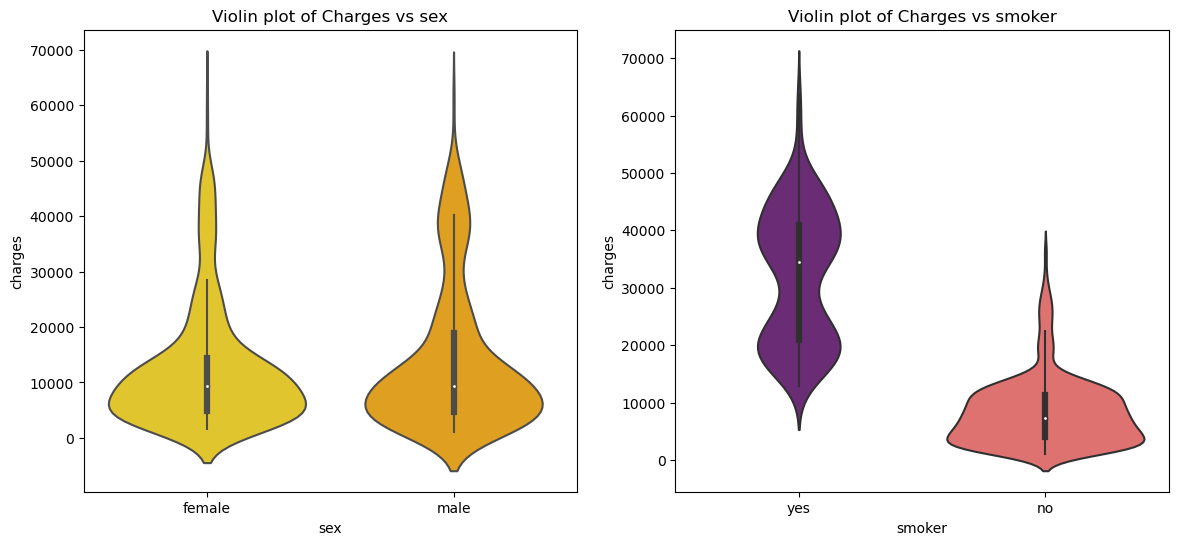

In [15]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

<AxesSubplot:xlabel='children', ylabel='charges'>

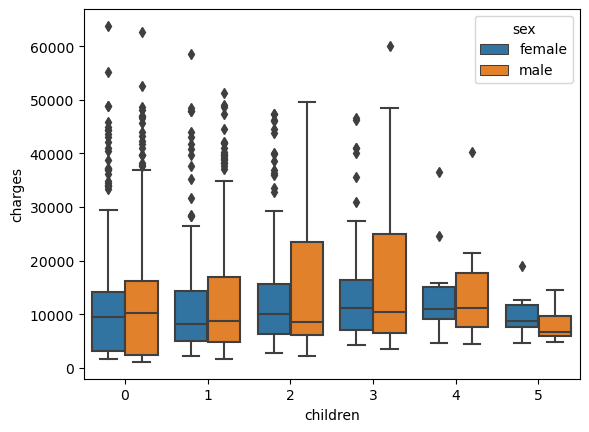

In [16]:
sns.boxplot(x='children', y='charges', hue='sex', data=df)

* Outliers are basically anomalies or errors during data collection process
* In this case as shown above, all data points are genuine and not collected by error, hence we are peoceeding ahead with the data and not removing outliers.

### Scatterplots are fine when there is a relatively small number of data values.For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship

<AxesSubplot:xlabel='bmi', ylabel='charges'>

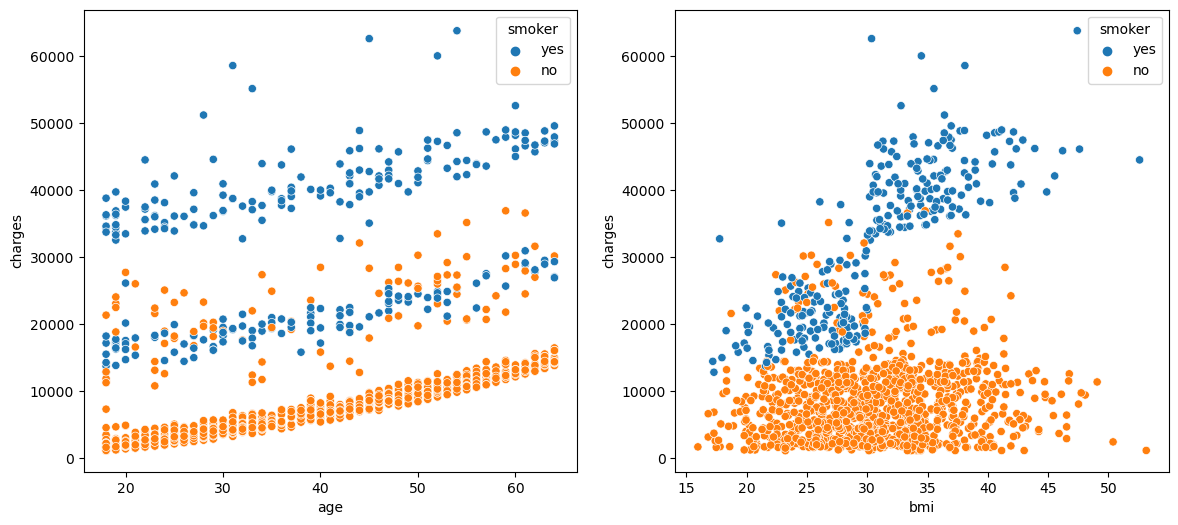

In [17]:
fig = plt.figure(figsize=(14, 6))
fig.add_subplot(121)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

fig.add_subplot(122)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')


* By looking at the left plot, charges are less for non smokers and excatly opposite condition we see for smokers. 

In [18]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

#### Below code uses one hot encoding to convert categorical data into numerical data

In [19]:
df2 = pd.get_dummies(data=df, columns=['sex', 'children', 'smoker', 'region'], prefix='OHE', prefix_sep='_', drop_first=True)

In [20]:
df2

age     bmi      charges  OHE_male  OHE_1  OHE_2  OHE_3  OHE_4  OHE_5  \
0      19  27.900  16884.92400         0      0      0      0      0      0   
1      18  33.770   1725.55230         1      1      0      0      0      0   
2      28  33.000   4449.46200         1      0      0      1      0      0   
3      33  22.705  21984.47061         1      0      0      0      0      0   
4      32  28.880   3866.85520         1      0      0      0      0      0   
...   ...     ...          ...       ...    ...    ...    ...    ...    ...   
1333   50  30.970  10600.54830         1      0      0      1      0      0   
1334   18  31.920   2205.98080         0      0      0      0      0      0   
1335   18  36.850   1629.83350         0      0      0      0      0      0   
1336   21  25.800   2007.94500         0      0      0      0      0      0   
1337   61  29.070  29141.36030         0      0      0      0      0      0   

      OHE_yes  OHE_northwest  OHE_southeast  OHE_southwest  
0           1              0              0              1  
1           0              0              1              0  
2           0              0              1              0  
3           0              1              0              0  
4           0              1              0              0  
...       ...            ...            ...            ...  
1333        0              1              0              0  
1334        0              0              0              0  
1335        0              0              1              0  
1336        0              0              0              1  
1337        1              1              0              0  

[1338 rows x 13 columns]

In [21]:
x = df2.drop(['charges'], axis=1)
x

age     bmi  OHE_male  OHE_1  OHE_2  OHE_3  OHE_4  OHE_5  OHE_yes  \
0      19  27.900         0      0      0      0      0      0        1   
1      18  33.770         1      1      0      0      0      0        0   
2      28  33.000         1      0      0      1      0      0        0   
3      33  22.705         1      0      0      0      0      0        0   
4      32  28.880         1      0      0      0      0      0        0   
...   ...     ...       ...    ...    ...    ...    ...    ...      ...   
1333   50  30.970         1      0      0      1      0      0        0   
1334   18  31.920         0      0      0      0      0      0        0   
1335   18  36.850         0      0      0      0      0      0        0   
1336   21  25.800         0      0      0      0      0      0        0   
1337   61  29.070         0      0      0      0      0      0        1   

      OHE_northwest  OHE_southeast  OHE_southwest  
0                 0              0              1  
1                 0              1              0  
2                 0              1              0  
3                 1              0              0  
4                 1              0              0  
...             ...            ...            ...  
1333              1              0              0  
1334              0              0              0  
1335              0              1              0  
1336              0              0              1  
1337              1              0              0  

[1338 rows x 12 columns]

In [22]:
y = pd.DataFrame(df['charges'], columns=['charges'])
y

charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]

# Build model without applying any transformation

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
preds = model.predict(x_test)

In [32]:
preds

array([[ 9939.95258403],
       [31409.49552962],
       [ 9041.54007114],
       [ 2466.12293138],
       [ 3617.76825679],
       [34785.49856497],
       [25282.89754157],
       [ 3785.09043093],
       [13389.35370806],
       [25667.89055892],
       [ 8123.34719055],
       [24645.74456109],
       [13604.10441621],
       [11780.53266575],
       [30730.33947579],
       [ 3826.36580319],
       [32262.27799523],
       [28989.18469687],
       [16101.4040258 ],
       [ 4573.2994167 ],
       [40221.75808887],
       [12072.89959993],
       [ 5924.87514846],
       [ 7428.6568019 ],
       [ 1062.49102476],
       [ 7153.68309176],
       [10887.54502388],
       [ 2085.89131218],
       [16183.51698432],
       [11855.14070448],
       [ 5336.2860218 ],
       [ 8281.40337081],
       [12753.39707499],
       [ 2467.43976879],
       [11978.78680448],
       [ 7824.28484821],
       [ 7326.87708287],
       [15438.2305215 ],
       [10306.6842549 ],
       [ 5914.55644237],


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
mean_absolute_error(y_test, preds)

4111.309055802554

In [35]:
mean_squared_error(y_test, preds)

34373992.660645

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test, preds)

0.7375301854000428

#### Linear regression assumes residual distribution(test-predictions) to be normally distributed. In below chart, it is not that much normally distributed. 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

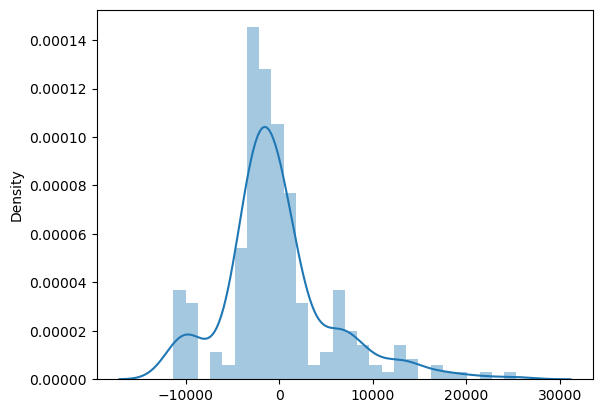

In [70]:
sns.distplot(y_test - preds)

#### We will check if data is normally distributed or not using Q-Q Plot

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


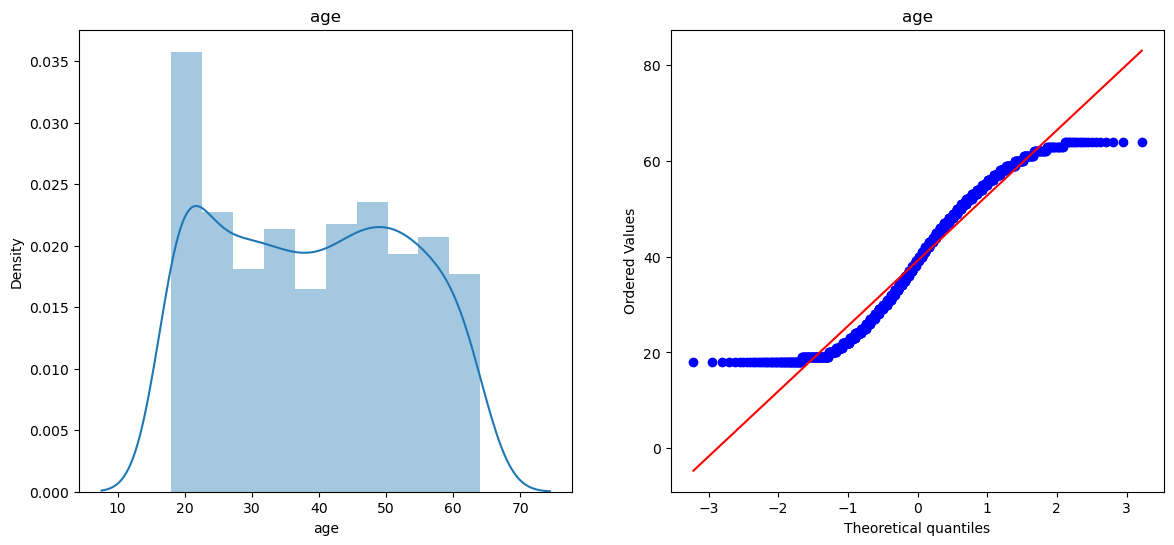

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


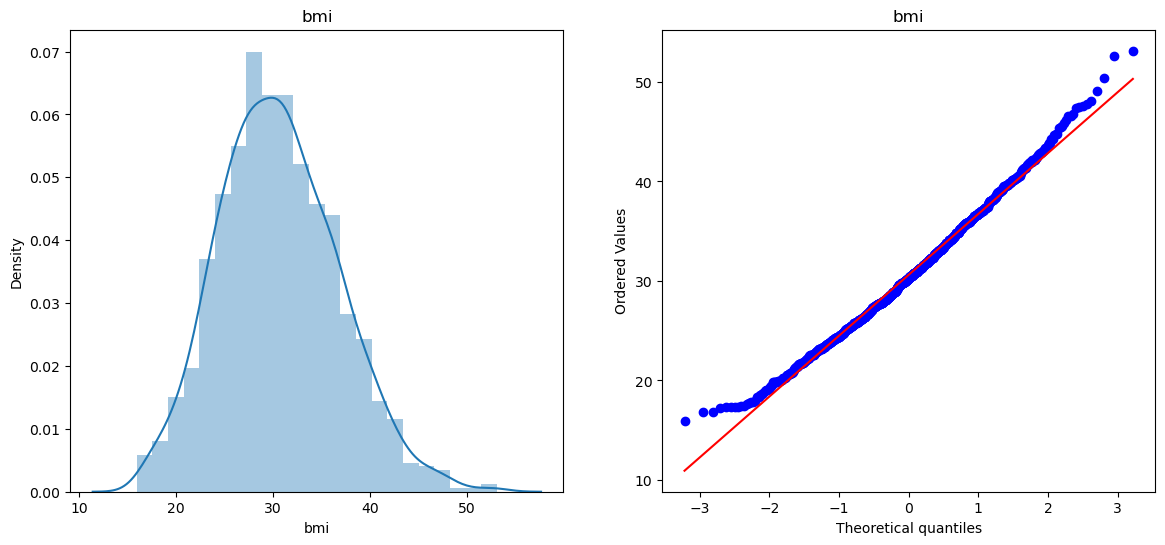

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


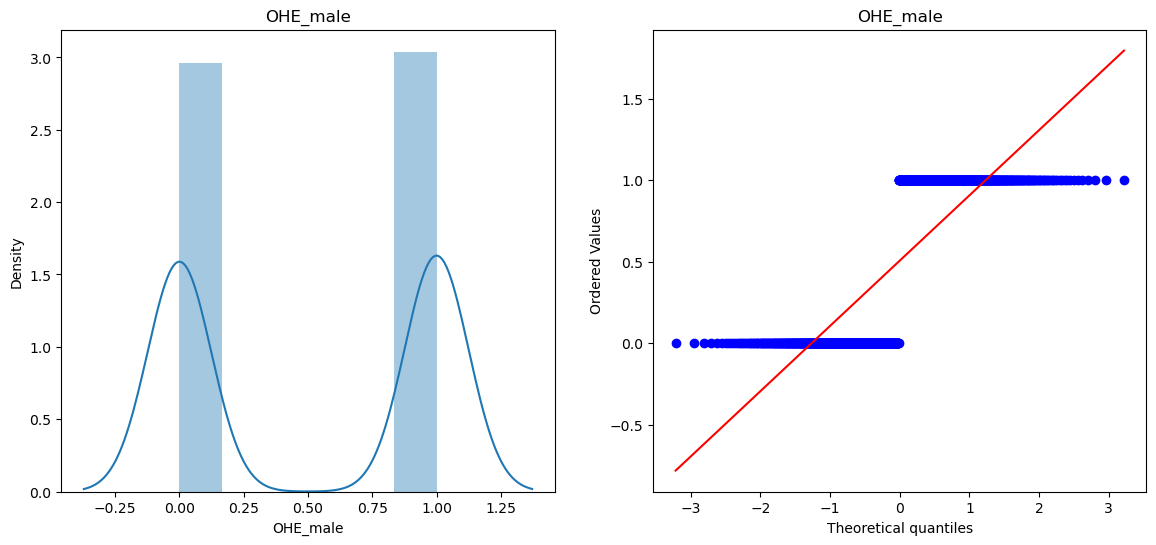

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


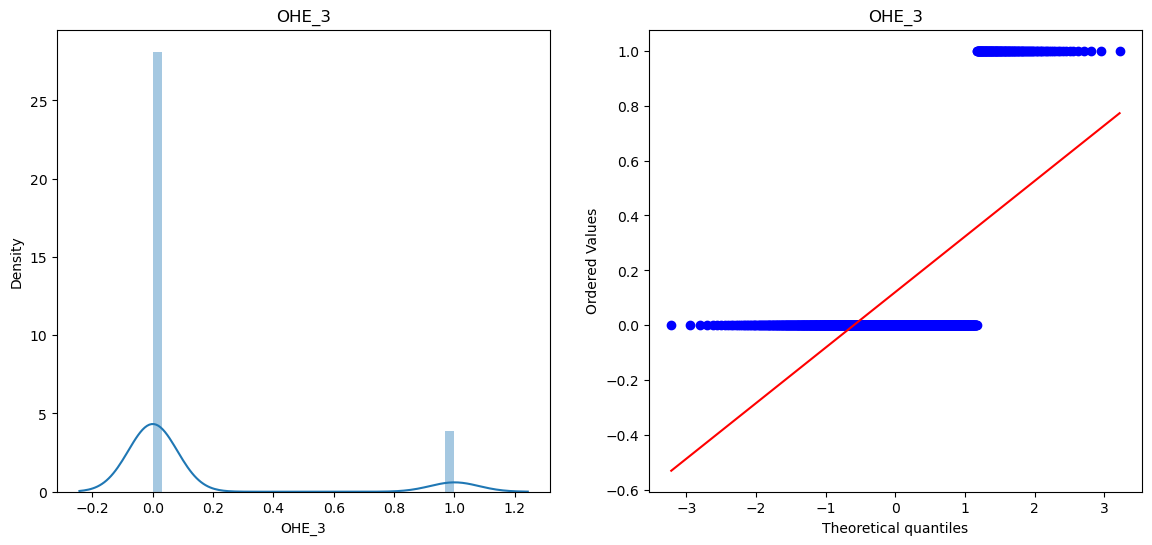

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


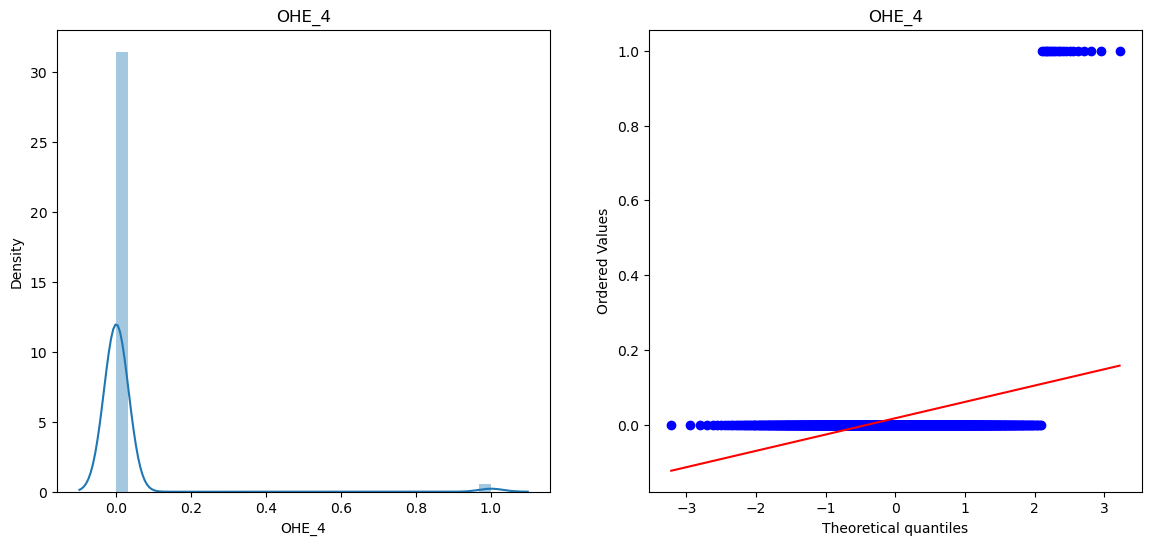

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


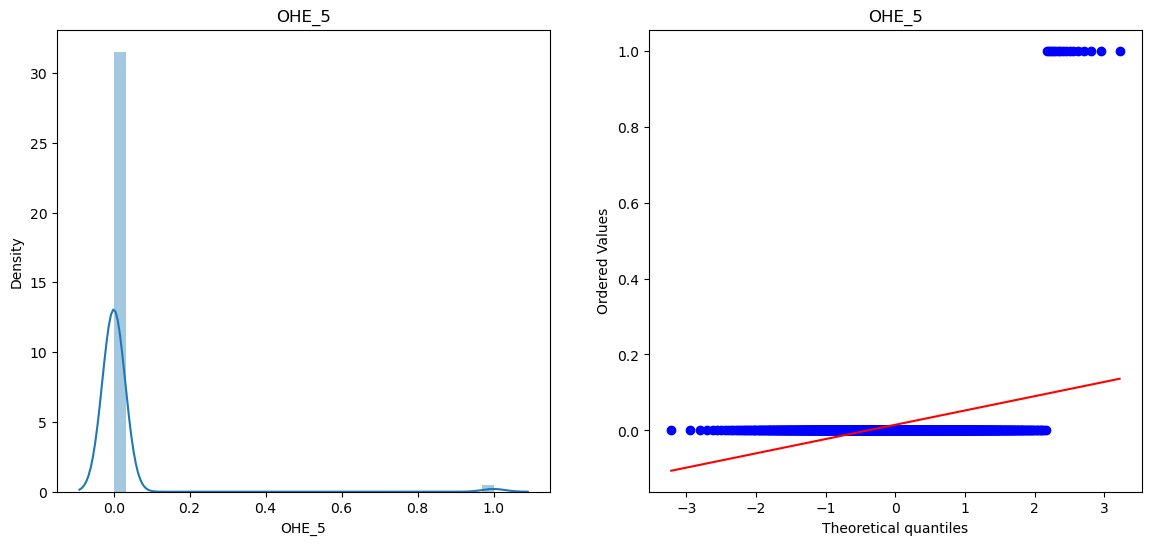

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


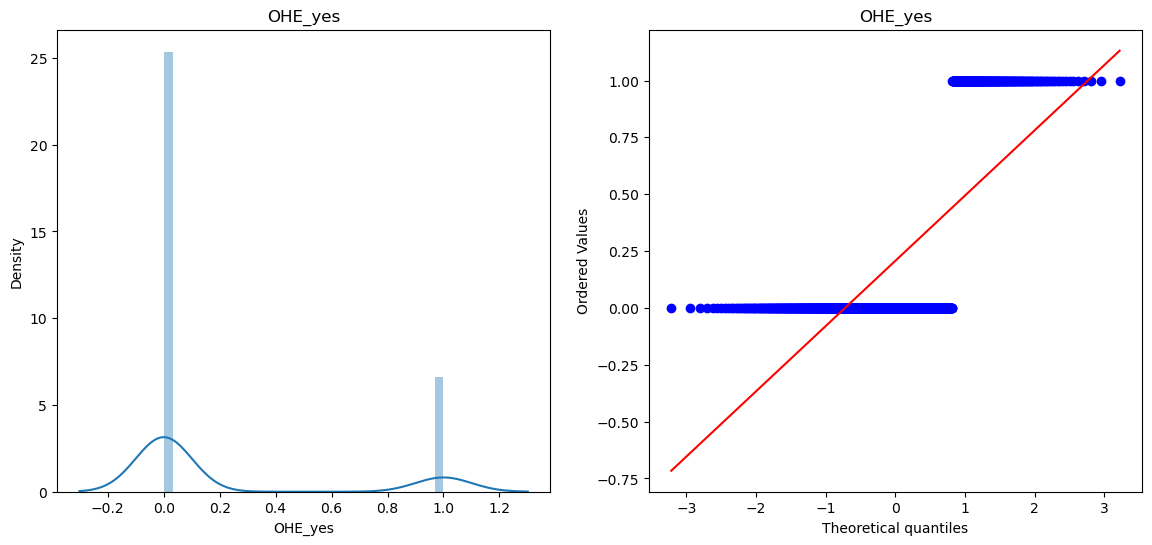

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


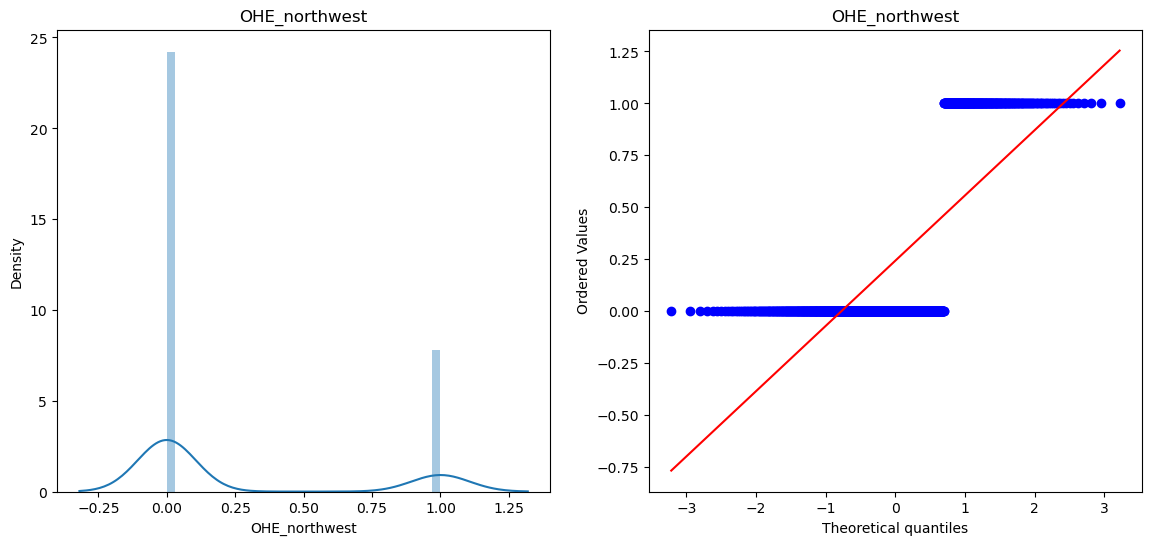

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


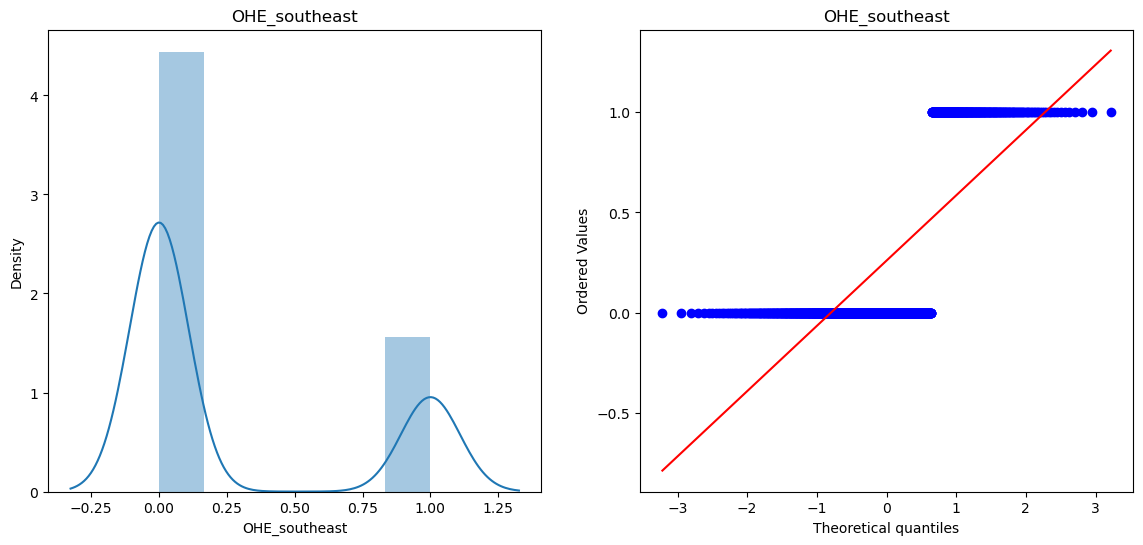

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [38]:
for col in x_train.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    scipy.stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)
    
    plt.show()

## Box-Cox Transformation

In [39]:
from sklearn.preprocessing import PowerTransformer

In [40]:
pt = PowerTransformer(method="box-cox")

In [41]:
x_train_transformed = pt.fit_transform(x_train + 0.000001)
x_test_transformed = pt.fit_transform(x_test + 0.000001)

In [42]:
x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=x_train.columns)
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns=x_test.columns)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


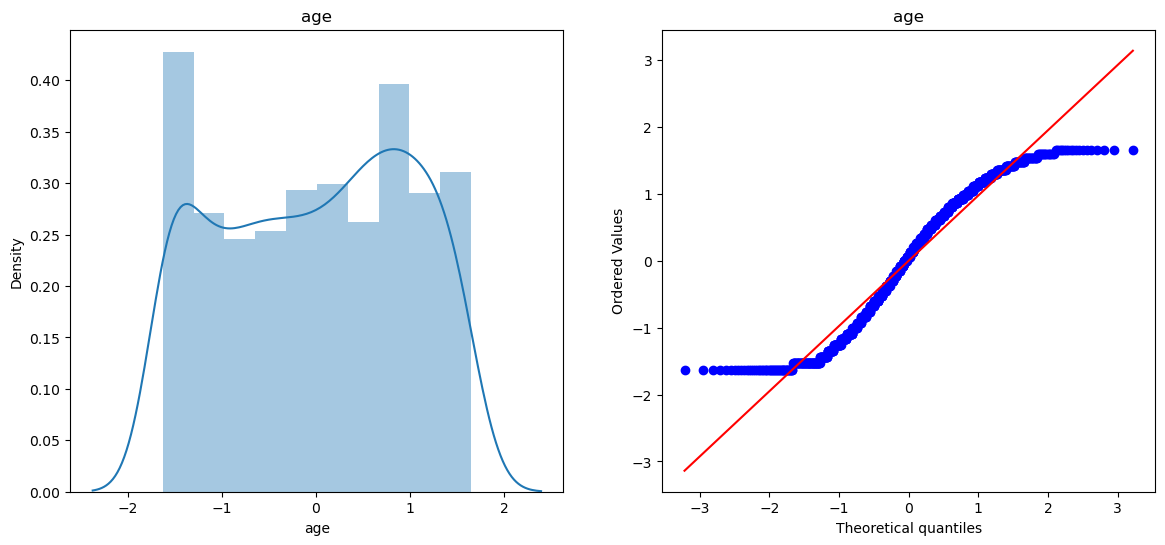

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


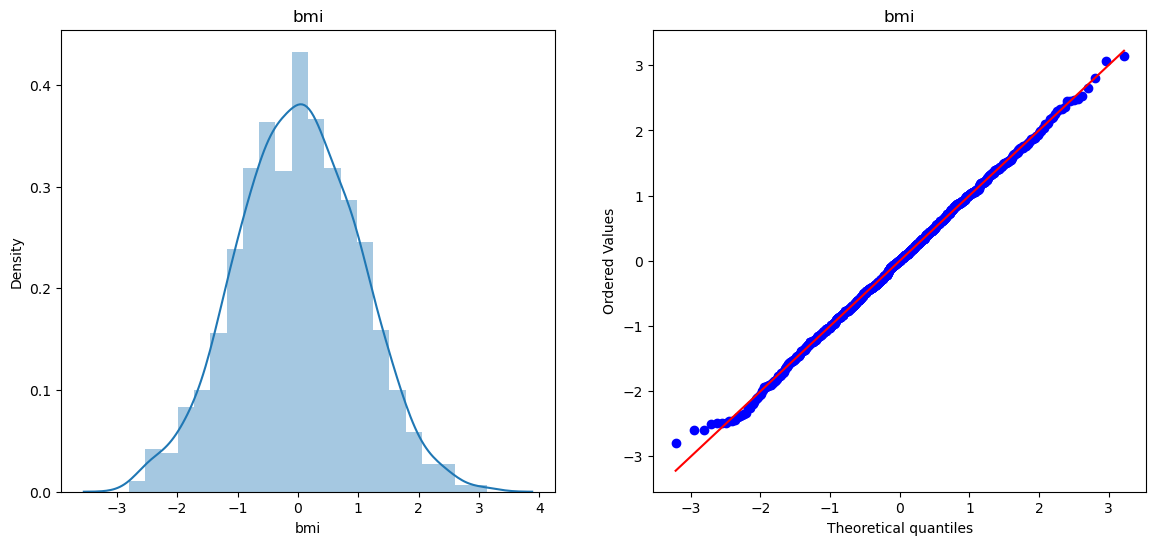

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


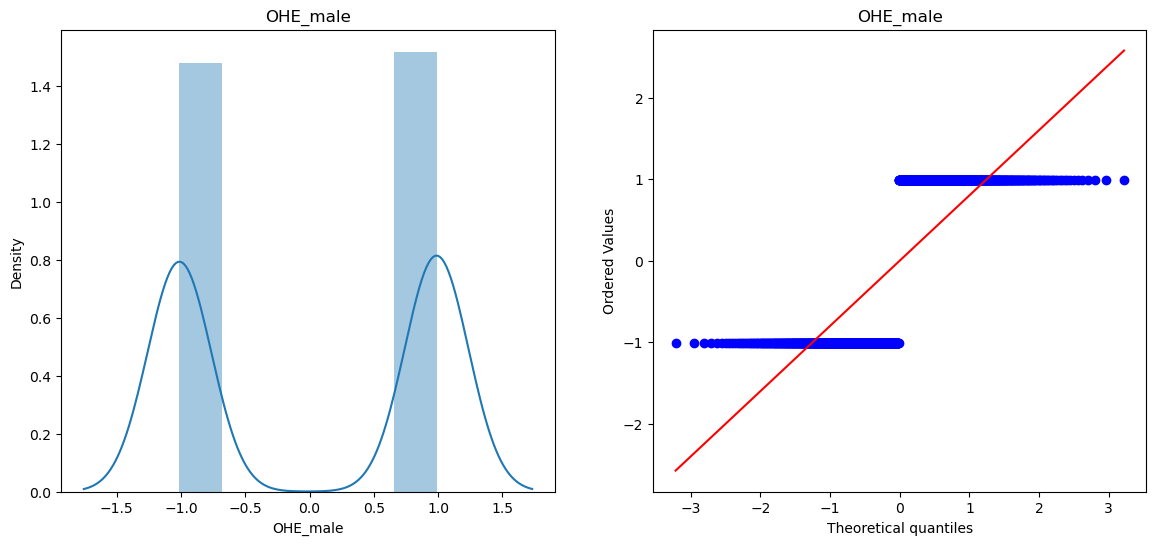

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


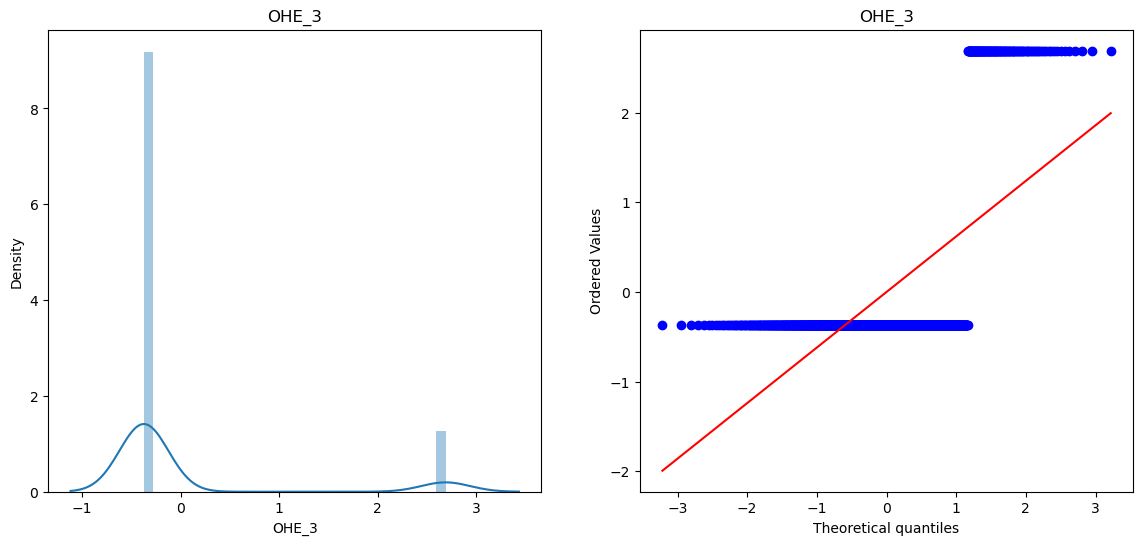

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


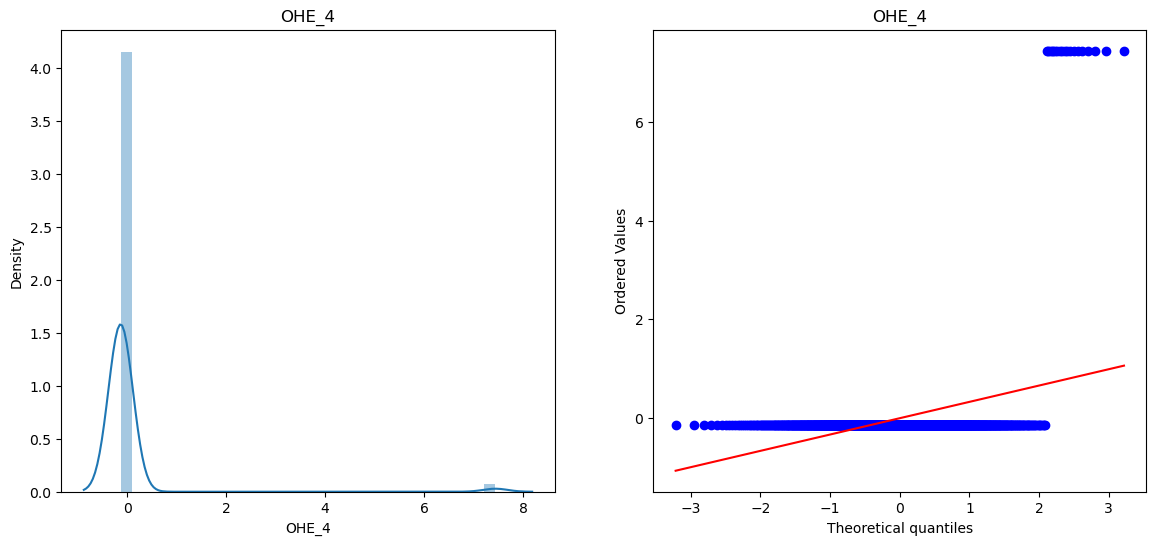

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


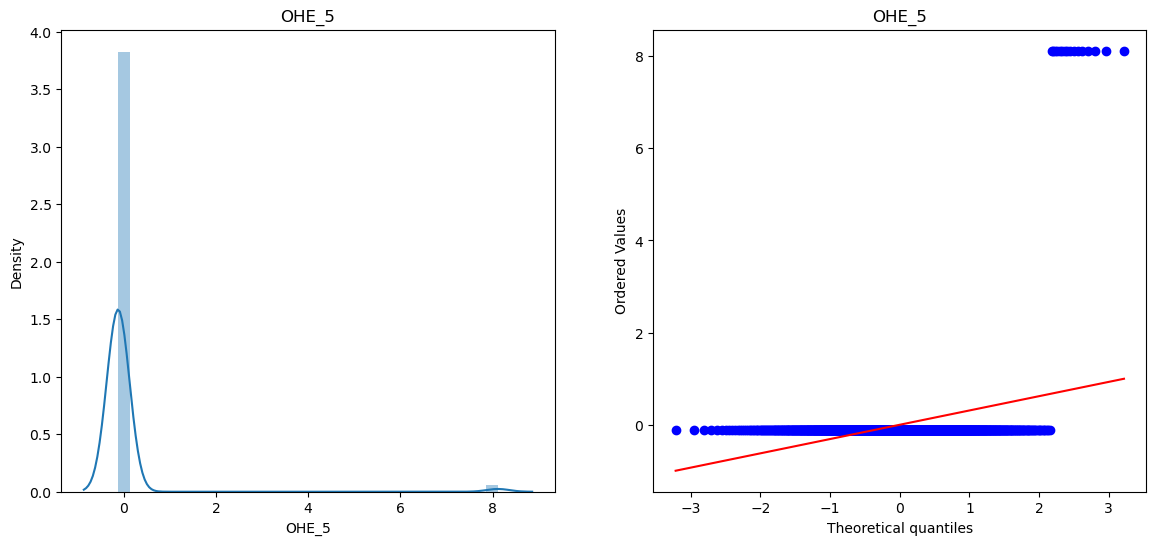

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [43]:
for col in x_train_transformed_df.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    sns.distplot(x_train_transformed_df[col])
    plt.title(col)
    
    plt.subplot(122)
    scipy.stats.probplot(x_train_transformed_df[col], dist="norm", plot=plt)
    plt.title(col)
    
    plt.show()

### Right skewed data

In [69]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.distplot(y)

    
plt.subplot(122)
scipy.stats.probplot(y['charges'], dist="norm", plot=plt)

    
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [45]:
y_train_transformed = pt.fit_transform(y_train)
y_test_transformed = pt.fit_transform(y_test)

In [46]:
# y_train_transformed.flatten()
# np.array(y_train).flatten()
y.describe()

charges
count   1338.000000
mean   13270.422265
std    12110.011237
min     1121.873900
25%     4740.287150
50%     9382.033000
75%    16639.912515
max    63770.428010

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


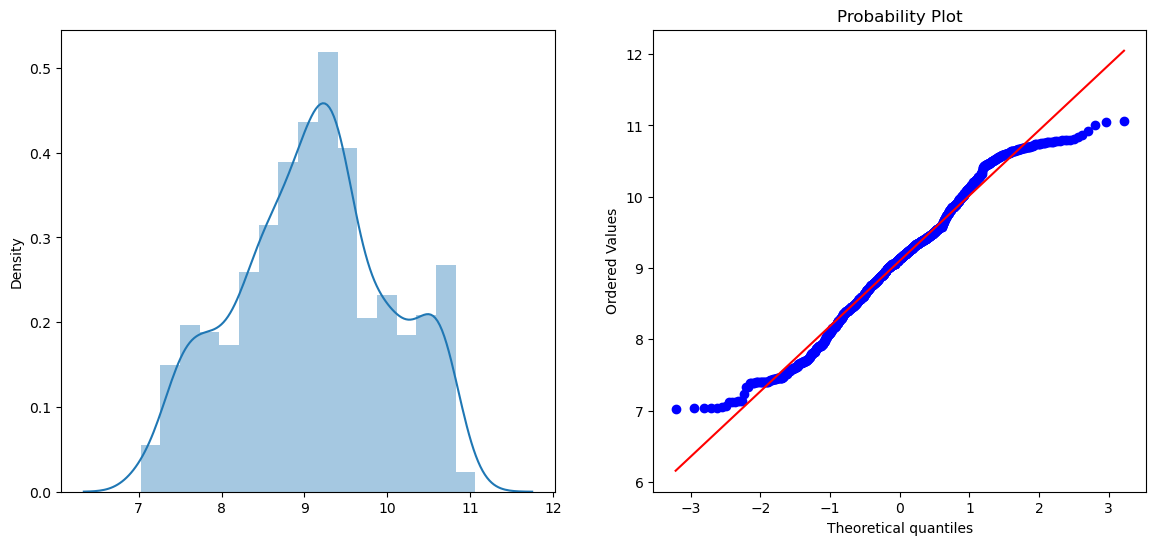

In [47]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.distplot(np.log(y_train))

plt.subplot(122)
scipy.stats.probplot(np.array(np.log(y_train)).flatten(), dist="norm", plot=plt)

    
plt.show()

### _log transformation_ is best way to handle _right skewed_ data. However, box-cox transformation can handles wide range of the skewness.

In [48]:
plt.figure(figsize=(20, 6))

plt.subplot(131)

sns.distplot(np.log(y))
plt.title(f'Log Transformation\n Skewness: {np.log(y).skew()}')

plt.subplot(132)
sns.distplot(np.sqrt(y))
plt.title(f'Square Root Transformation\n Skewness: {np.sqrt(y).skew()}')

plt.subplot(133)
sns.distplot(np.cbrt(y))
plt.title(f'Cube Root Transformation\n Skewness: {np.cbrt(y).skew()}')

plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

In [49]:
pd.DataFrame(y_train_transformed).skew()

0   -0.006185
dtype: float64

### Build model with box cox transformation applied

In [50]:
model2 = LinearRegression()

In [51]:
model2.fit(x_train_transformed_df, y_train_transformed)

LinearRegression()

In [52]:
preds2 = model2.predict(x_test_transformed_df)

In [53]:
mean_absolute_error(y_test_transformed, preds2)

0.3255908160245131

In [54]:
mean_squared_error(y_test_transformed, preds2)

0.23208090178788984

In [55]:
r2_score(y_test_transformed, preds2)

0.7679190982121102

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

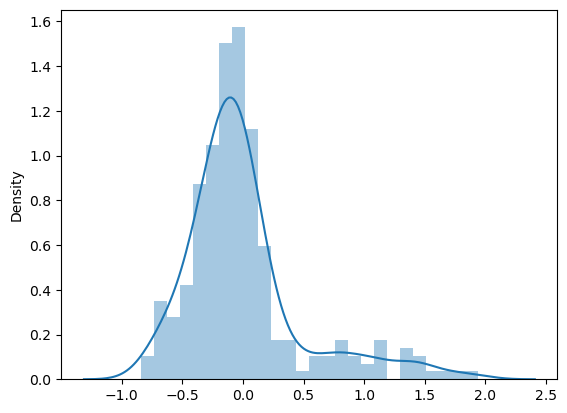

In [56]:
sns.distplot(y_test_transformed - preds2)

### Model3 with log transformation applied to the dependent variable

In [75]:
model3 = LinearRegression()

In [80]:
y_train_log_transformed = pd.DataFrame(np.log(y_train), columns=['charges'])
y_test_log_transformed = pd.DataFrame(np.log(y_test), columns=['charges'])

In [81]:
model3.fit(x_train, y_train_log_transformed)

LinearRegression()

In [83]:
preds3 = model3.predict(x_test)

In [84]:
preds3

array([[ 9.01314511],
       [10.00179992],
       [ 8.8463964 ],
       [ 7.89530965],
       [ 8.08217512],
       [10.61354969],
       [ 9.39598737],
       [ 8.20409004],
       [ 9.26100543],
       [ 9.3643514 ],
       [ 8.66674506],
       [ 9.50769829],
       [ 9.3919156 ],
       [ 9.4790866 ],
       [10.32415847],
       [ 8.51805805],
       [10.21034148],
       [10.07901549],
       [ 9.78660666],
       [ 8.124535  ],
       [11.12065652],
       [ 9.30691124],
       [ 8.11009251],
       [ 8.59519961],
       [ 8.20001586],
       [ 8.9574352 ],
       [ 9.13932107],
       [ 7.88052329],
       [ 9.67008472],
       [ 9.42849874],
       [ 8.2464514 ],
       [ 8.51224581],
       [ 9.09770257],
       [ 7.82470226],
       [ 9.29883981],
       [ 8.91391379],
       [ 8.82414701],
       [ 9.37809364],
       [ 8.97310694],
       [ 8.8642437 ],
       [ 9.5352312 ],
       [ 8.83193188],
       [ 8.41978245],
       [ 8.94196388],
       [ 9.61866322],
       [ 9

In [85]:
mean_absolute_error(y_test_log_transformed, preds3)

0.29234679565306987

In [86]:
mean_squared_error(y_test_log_transformed, preds3)

0.19850574663266318

In [87]:
np.sqrt(mean_squared_error(y_test_log_transformed, preds3))

0.4455398373127404

In [88]:
r2_score(y_test_log_transformed, preds3)

0.7614628613854477

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

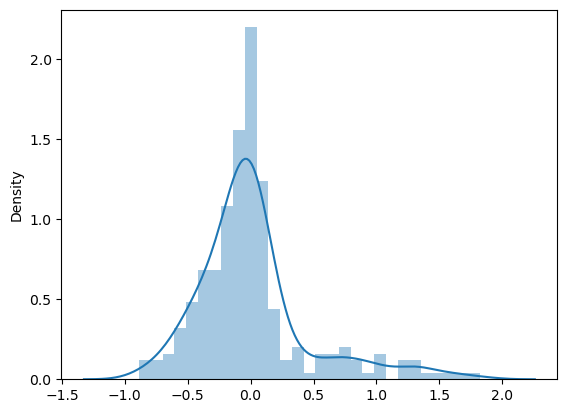

In [89]:
sns.distplot(y_test_log_transformed - preds3)

In [90]:
plt.scatter(y_test_log_transformed, preds3)

* This is giving better model

In [109]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121)
sns.scatterplot(y_test_log_transformed['charges'], preds3.flatten(), ax=ax, color='r')
ax.set_title("Linearity Check : Actual vs Predicted")

ax = fig.add_subplot(122)
sns.distplot(y_test_transformed - preds3, color='b')
ax.axvline(((y_test_transformed - preds3).mean()).mean(), linestyle='--')
ax.set_title("Normality check for residual ")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normality check for residual ')